In [2]:
import os
import pandas as pd
os.listdir(os.getcwd())

['main.py',
 'CitytemperatureAnalysis.ipynb',
 'get-weather.sh',
 '.#index.org',
 '.ipynb_checkpoints',
 'index.org~',
 'output.log',
 'clima-madrid-hoy.csv',
 'main.py~',
 'weather-site']

In [3]:
import csv
csv_file = 'clima-madrid-hoy.csv'
filtered_rows = []
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row)==28:
            filtered_rows.append(row)
len(filtered_rows)

61

In [4]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
try:
    df = pd.read_csv('clima-madrid-hoy.csv')
    print("DataFrame creado exitosamente.")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo CSV: {e}")

# Mostrar las dimensiones del DataFrame
print("Dimensiones del DataFrame:", df.shape)




DataFrame creado exitosamente.
Dimensiones del DataFrame: (60, 28)


In [5]:
df.sample(5)

,Fecha,Temperatura,Humedad,Presión,Velocidad del viento,dt,coord_lon,coord_lat,weather_0_id,weather_0_main,...,clouds_all,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod
54,2024-08-13 10:00:03,30.35,32,1008,7.20,1723561043,-3.7034,40.4163,800,Clear,...,0,2,2007545,ES,1723526645,1723576522,7200,3117735,Madrid,200
10,2024-08-12 20:55:02,25.41,42,1010,3.13,1723514033,-3.7038,40.4168,800,Clear,...,0,2,2007545,ES,1723526645,1723576522,7200,3117735,Madrid,200
52,2024-08-13 09:58:03,30.35,32,1008,7.20,1723561043,-3.7034,40.4163,800,Clear,...,0,2,2007545,ES,1723526645,1723576522,7200,3117735,Madrid,200
29,2024-08-12 21:14:02,25.22,43,1010,3.09,1723515003,-3.7038,40.4168,800,Clear,...,0,2,2007545,ES,1723526645,1723576522,7200,3117735,Madrid,200
48,2024-08-13 09:53:02,30.44,31,1008,7.20,1723560591,-3.7026,40.4165,800,Clear,...,0,2,2007545,ES,1723526645,1723576521,7200,3117735,Madrid,200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fecha                  60 non-null     object 
 1   Temperatura            60 non-null     float64
 2   Humedad                60 non-null     int64  
 3   Presión                60 non-null     int64  
 4   Velocidad del viento   60 non-null     float64
 5   dt                     60 non-null     int64  
 6   coord_lon              60 non-null     float64
 7   coord_lat              60 non-null     float64
 8   weather_0_id           60 non-null     int64  
 9   weather_0_main         60 non-null     object 
 10  weather_0_description  60 non-null     object 
 11  weather_0_icon         60 non-null     object 
 12  base                   60 non-null     object 
 13  main_temp              60 non-null     float64
 14  main_feels_like        60 non-null     float64
 15  visibili

In [7]:
df.dt = df.dt.astype(int)
df.sys_sunrise = df.sys_sunrise.astype(int)
df.sys_sunset = df.sys_sunset.astype(int)
for column in df.columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        next

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fecha                  60 non-null     object 
 1   Temperatura            60 non-null     float64
 2   Humedad                60 non-null     int64  
 3   Presión                60 non-null     int64  
 4   Velocidad del viento   60 non-null     float64
 5   dt                     60 non-null     int64  
 6   coord_lon              60 non-null     float64
 7   coord_lat              60 non-null     float64
 8   weather_0_id           60 non-null     int64  
 9   weather_0_main         60 non-null     object 
 10  weather_0_description  60 non-null     object 
 11  weather_0_icon         60 non-null     object 
 12  base                   60 non-null     object 
 13  main_temp              60 non-null     float64
 14  main_feels_like        60 non-null     float64
 15  visibili

In [9]:
from datetime import datetime
df_etl = df.copy()
df_etl.dt = df.dt.apply(lambda x: datetime.fromtimestamp(x))
df_etl.sys_sunrise = df.sys_sunrise.apply(lambda x: datetime.fromtimestamp(x))
df_etl.sys_sunset = df.sys_sunset.apply(lambda x: datetime.fromtimestamp(x))
df_etl.sample(5)

,Fecha,Temperatura,Humedad,Presión,Velocidad del viento,dt,coord_lon,coord_lat,weather_0_id,weather_0_main,...,clouds_all,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod
10,2024-08-12 20:55:02,25.41,42,1010,3.13,2024-08-12 20:53:53,-3.7038,40.4168,800,Clear,...,0,2,2007545,ES,2024-08-13 00:24:05,2024-08-13 14:15:22,7200,3117735,Madrid,200
57,2024-08-13 10:03:01,30.35,32,1008,7.20,2024-08-13 09:57:23,-3.7034,40.4163,800,Clear,...,0,2,2007545,ES,2024-08-13 00:24:05,2024-08-13 14:15:22,7200,3117735,Madrid,200
17,2024-08-12 21:02:02,25.41,42,1010,3.13,2024-08-12 20:53:53,-3.7038,40.4168,800,Clear,...,0,2,2007545,ES,2024-08-13 00:24:05,2024-08-13 14:15:22,7200,3117735,Madrid,200
52,2024-08-13 09:58:03,30.35,32,1008,7.20,2024-08-13 09:57:23,-3.7034,40.4163,800,Clear,...,0,2,2007545,ES,2024-08-13 00:24:05,2024-08-13 14:15:22,7200,3117735,Madrid,200
33,2024-08-12 21:18:01,25.22,43,1010,3.09,2024-08-12 21:10:03,-3.7038,40.4168,800,Clear,...,0,2,2007545,ES,2024-08-13 00:24:05,2024-08-13 14:15:22,7200,3117735,Madrid,200


Generalmente es de interés realizar un breve análisis estadístico de las variables del dataset

In [10]:
df_etl.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Temperatura,60.0,26.2285,23.53,25.22,25.41,25.45,30.44,2.232101
Humedad,60.0,40.683333,31.0,41.0,42.0,43.0,50.0,5.123861
Presión,60.0,1009.566667,1008.0,1010.0,1010.0,1010.0,1010.0,0.8309
Velocidad del viento,60.0,4.048333,2.57,3.09,3.13,4.12,7.2,1.710616
dt,60,2024-08-12 23:57:50.433332992,2024-08-12 20:39:03,2024-08-12 20:53:53,2024-08-12 21:10:03,2024-08-12 22:41:47.249999872,2024-08-13 09:57:23,NaN
coord_lon,60.0,-3.703593,-3.7038,-3.7038,-3.7038,-3.7036,-3.7,0.000568
coord_lat,60.0,40.416712,40.4163,40.416775,40.4168,40.4168,40.417,0.000182
weather_0_id,60.0,800.0,800.0,800.0,800.0,800.0,800.0,0.0
main_temp,60.0,26.2285,23.53,25.22,25.41,25.45,30.44,2.232101
main_feels_like,60.0,25.7415,23.22,24.92,25.1,25.12,29.25,1.900376


Presentación de Resultados
Se procede a realizar gráficas de interés para estudiar el comportamiento climatológico

Text(0.5, 1.0, 'Main Temp vs Time in Sol')

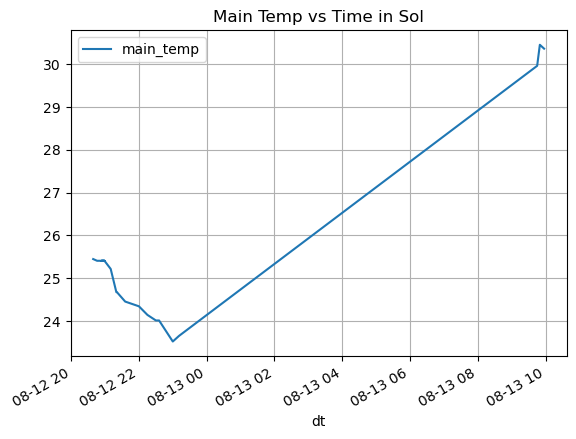

In [11]:
import matplotlib.pyplot as plt

df_etl.plot.line('dt', 'main_temp')
plt.grid()
plt.title(f'Main Temp vs Time in {next(iter(set(df_etl.name)))}')

In [17]:
import plotly_express as px
fig = px.line(df_etl, x='dt', y=['main_temp', 'Humedad'], title=f"Main Tem & Humidity vs Time in {next(iter(set(df_etl.name)))}")
fig.show()
fig.write_image("/home/jorge_torres/Alex/weather-site/public/humedadvstiempo.png")

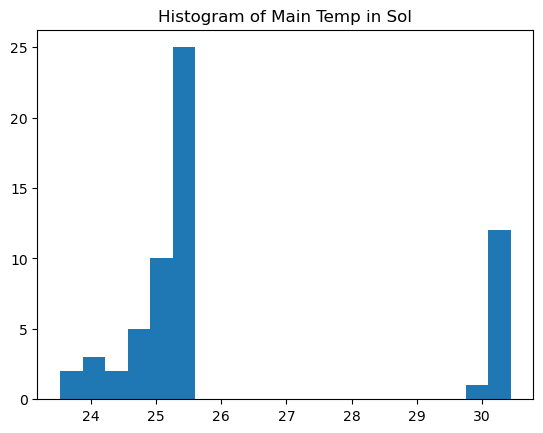

In [18]:
df_etl.main_temp.hist(bins=20)
plt.title(f'Histogram of Main Temp in {next(iter(set(df_etl.name)))}')
plt.grid()


In [19]:
fig = px.violin(df_etl, 'main_temp', title=f"Violin Plot Main Temp in {next(iter(set(df_etl.name)))}")
fig.show()

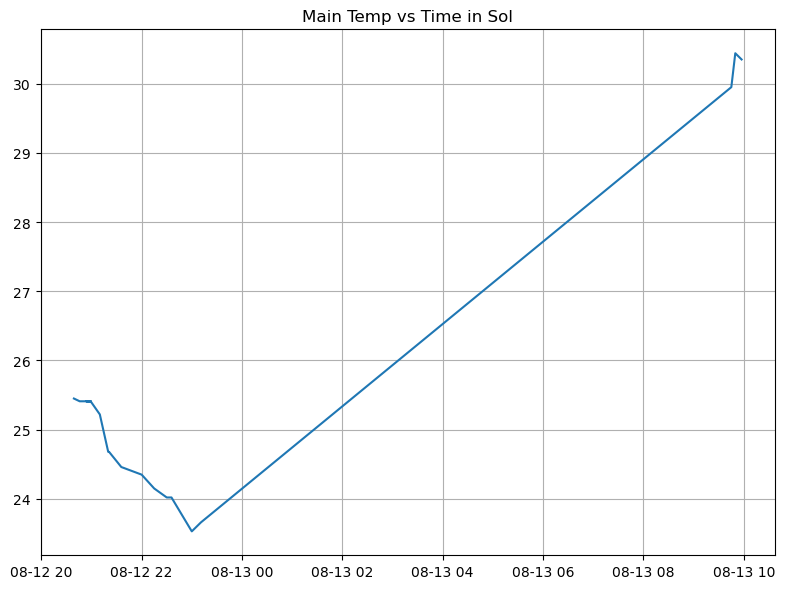

In [20]:
fig = plt.figure(figsize=(8,6))
plt.plot(df_etl['dt'], df_etl['main_temp'])
plt.grid()
plt.title(f'Main Temp vs Time in {next(iter(set(df_etl.name)))}')
fig.tight_layout()
fname = '/home/jorge_torres/Alex/weather-site/content/images/temperature.png'
plt.savefig(fname)

<Axes: xlabel='day', ylabel='tip'>

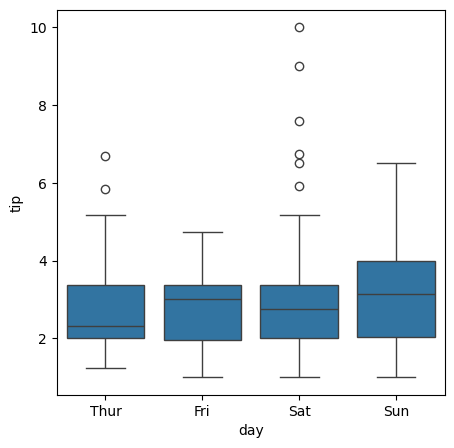

In [22]:
#+begin_src python :results graphics file output :file boxplot.svg
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="tip", data=tips)
#+end_src